<a href="https://colab.research.google.com/github/SEBIN6/HR-Analytics---Predict-Employee-Attrition/blob/main/model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("hr_processed.csv")


df_encoded = pd.get_dummies(df.drop("Attrition", axis=1), drop_first=True)


y = df["Attrition"].map({"Yes": 1, "No": 0})
X = df_encoded


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))




Model Accuracy: 0.86

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.44      0.18      0.25        39

    accuracy                           0.86       294
   macro avg       0.66      0.57      0.59       294
weighted avg       0.83      0.86      0.83       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confussion Matrix

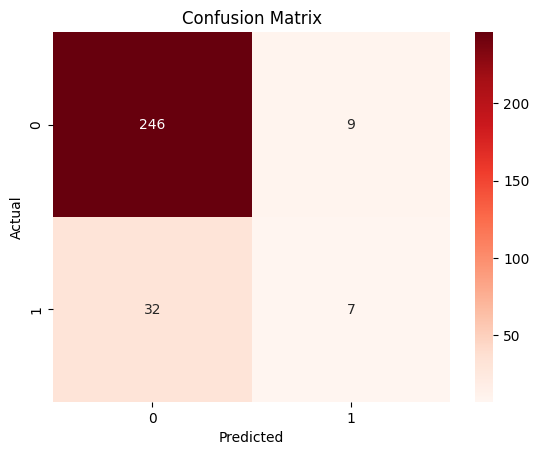

In [2]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()